In [1]:
!pip install statsmodels


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: c:\users\91732\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [3]:
df= pd.read_csv('GlobalTemperatures.csv')
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [5]:
df.drop(['LandMaxTemperature','LandMaxTemperatureUncertainty','LandMinTemperature','LandMinTemperatureUncertainty','LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty'],axis=1,inplace=True)


In [6]:
df['dt']=pd.to_datetime(df['dt'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   dt                                 3192 non-null   datetime64[ns]
 1   LandAverageTemperature             3180 non-null   float64       
 2   LandAverageTemperatureUncertainty  3180 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 74.9 KB


In [8]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574
1,1750-02-01,3.083,3.702
2,1750-03-01,5.626,3.076
3,1750-04-01,8.490,2.451
4,1750-05-01,11.573,2.072


In [9]:
df.set_index('dt',inplace=True)

In [10]:
df.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty
dt,,
1750-01-01,3.034,3.574
1750-02-01,3.083,3.702
1750-03-01,5.626,3.076
1750-04-01,8.490,2.451
1750-05-01,11.573,2.072


In [11]:
df.isnull().sum()

LandAverageTemperature               12
LandAverageTemperatureUncertainty    12
dtype: int64

In [12]:
df['LandAverageTemperature'] = df['LandAverageTemperature'].fillna(df['LandAverageTemperature'].mean())

In [13]:
df['LandAverageTemperatureUncertainty'] = df['LandAverageTemperatureUncertainty'].fillna(df['LandAverageTemperatureUncertainty'].mean())

In [14]:
df.isnull().sum()

LandAverageTemperature               0
LandAverageTemperatureUncertainty    0
dtype: int64

<AxesSubplot: xlabel='dt'>

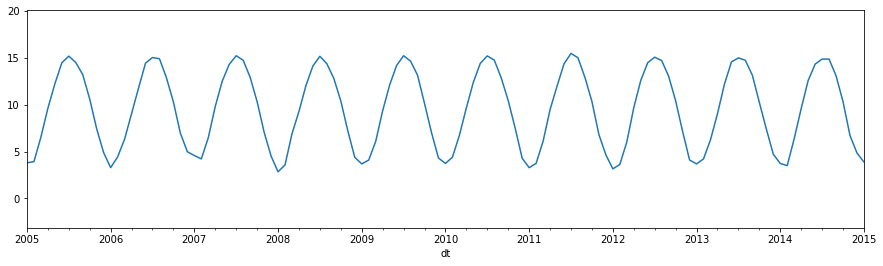

In [15]:
df['LandAverageTemperature'].plot(xlim=['2005-01-01','2015-01-01'],figsize=(15,4))

### Checking whether the dataset is a stationary or not

In [16]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adf_test(df['LandAverageTemperature'])

ADF Statistics: -4.036039785872676
p- value: 0.0012331195770598107
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


**As it is a seasonal data, will do 12 times differencing i.e. shift(12)**


In [18]:
df['LandAverageTemperature_12difference']= df['LandAverageTemperature']-df['LandAverageTemperature'].shift(12)

In [19]:
adf_test((df['LandAverageTemperature_12difference']).dropna())

ADF Statistics: -16.245241151994403
p- value: 3.692614581683388e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


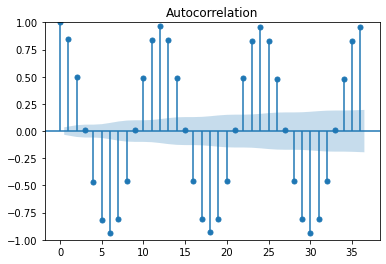

In [20]:
acf = plot_acf(df['LandAverageTemperature']) # ACF used for moving average

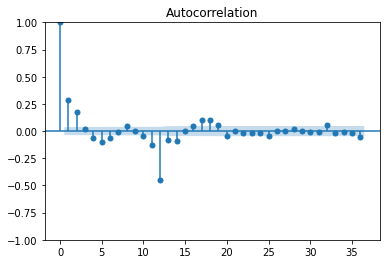

In [21]:
acf2 = plot_acf(df['LandAverageTemperature_12difference'].dropna())

c:\users\91732\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


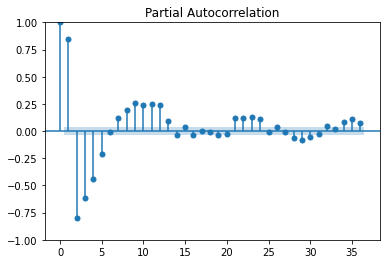

In [22]:
pacf = plot_pacf(df['LandAverageTemperature'].dropna()) #PACF used for auto regression

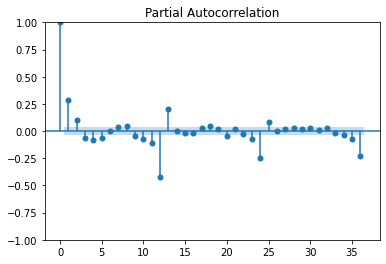

In [23]:
pacf2 = plot_pacf(df['LandAverageTemperature_12difference'].dropna())

In [24]:
df

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandAverageTemperature_12difference
dt,,,
1750-01-01,3.034,3.574,NaN
1750-02-01,3.083,3.702,NaN
1750-03-01,5.626,3.076,NaN
1750-04-01,8.490,2.451,NaN
1750-05-01,11.573,2.072,NaN
...,...,...,...
2015-08-01,14.755,0.072,-0.120
2015-09-01,12.999,0.079,-0.092
2015-10-01,10.801,0.102,0.471


In [25]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2005,12,1)
test_dataset_end=datetime(2015,12,1)

In [26]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [27]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [28]:
test_data

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandAverageTemperature_12difference
dt,,,
2006-01-01,3.286,0.064,-0.522
2006-02-01,4.430,0.118,0.510
2006-03-01,6.329,0.077,-0.215
2006-04-01,9.055,0.089,-0.563
2006-05-01,11.786,0.092,-0.440
...,...,...,...
2015-08-01,14.755,0.072,-0.120
2015-09-01,12.999,0.079,-0.092
2015-10-01,10.801,0.102,0.471
